In [45]:
from scripts import calculate_IoU_new_env as IoU
import glob
import pandas as pd
import numpy as np
import cv2 
import matplotlib.pyplot as plt

In [52]:
path = '/Volumes/GoogleDrive/マイドライブ/Uchida/RawData/WISH/*/*'
print(len(glob.glob(path)))
print(sorted(glob.glob(path))[0])
img_path = sorted(glob.glob(path))[0]

300
/Volumes/GoogleDrive/マイドライブ/Uchida/RawData/WISH/220411/ndr2_st.15_202204080_20220411_embryo10_1_expression.tif


In [84]:
results = pd.read_csv('/Volumes/GoogleDrive/マイドライブ/Uchida/RawData/WISH/results.csv')
results

,FILENAME,LOW,HIGH
0,ndr2_st.15_202204080_20220411_embryo10_1_expre...,60,80
1,ndr2_st.15_202204080_20220411_embryo11_1_expre...,45,60
2,ndr2_st.15_202204080_20220411_embryo12_1_expre...,25,50
3,ndr2_st.15_202204080_20220411_embryo13_1_expre...,30,45
4,ndr2_st.15_202204080_20220411_embryo14_1_expre...,25,30
...,...,...,...
298,wnt8_st.15_20220626_20220628_embryo23_3_expres...,60,80
299,wnt8_st.15_20220626_20220628_embryo25_3_expres...,45,75
300,wnt8_st.15_20220626_20220628_embryo26_3_expres...,60,75
301,wnt8_st.15_20220626_20220628_embryo27_3_expres...,45,55


In [53]:
img = cv2.imread(img_path)
IoU.preprocess(img, thr = 100)
img_exp = IoU.crop_expression_area(img_path, thr =100, area_min=100, area_max=10000)

error: OpenCV(3.4.9) /Users/travis/build/skvark/opencv-python/opencv/modules/imgproc/src/contours.cpp:197: error: (-210:Unsupported format or combination of formats) [Start]FindContours supports only CV_8UC1 images when mode != CV_RETR_FLOODFILL otherwise supports CV_32SC1 images only in function 'cvStartFindContours_Impl'


In [58]:
thr = 70
area_min=100; area_max=100000
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
IMG = img.copy()
clahe = cv2.createCLAHE(clipLimit=4.0, tileGridSize=(5,5))
IMG = clahe.apply(IMG)
_, binary = cv2.threshold(IMG, thr, 255, cv2.THRESH_BINARY)
_,contours, _ = cv2.findContours(binary,
                                        cv2.RETR_LIST,
                                        cv2.CHAIN_APPROX_SIMPLE)
areas = []
for i in range(0, len(contours)):
    if len(contours[i]) > 0:
    # remove small objects
        if (min(contours[i][:,0,1]) < int(IMG.shape[0]/2)) & (min(contours[i][:,0,0]) < int(IMG.shape[1]/2)) & (cv2.contourArea(contours[i]) > area_min )& (cv2.contourArea(contours[i]) < area_max ) :
            rect = contours[i]
            areas.append(rect)


抽出された領域の個数 19


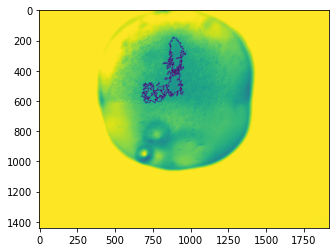

In [66]:
imgcont =cv2.imread(img_path,0)
print("抽出された領域の個数 {}".format(len(areas)))
cv2.drawContours(imgcont,
                            areas
                            ,-1
                            ,(0,0,255),
                           thickness = 2)
plt.imshow(imgcont)

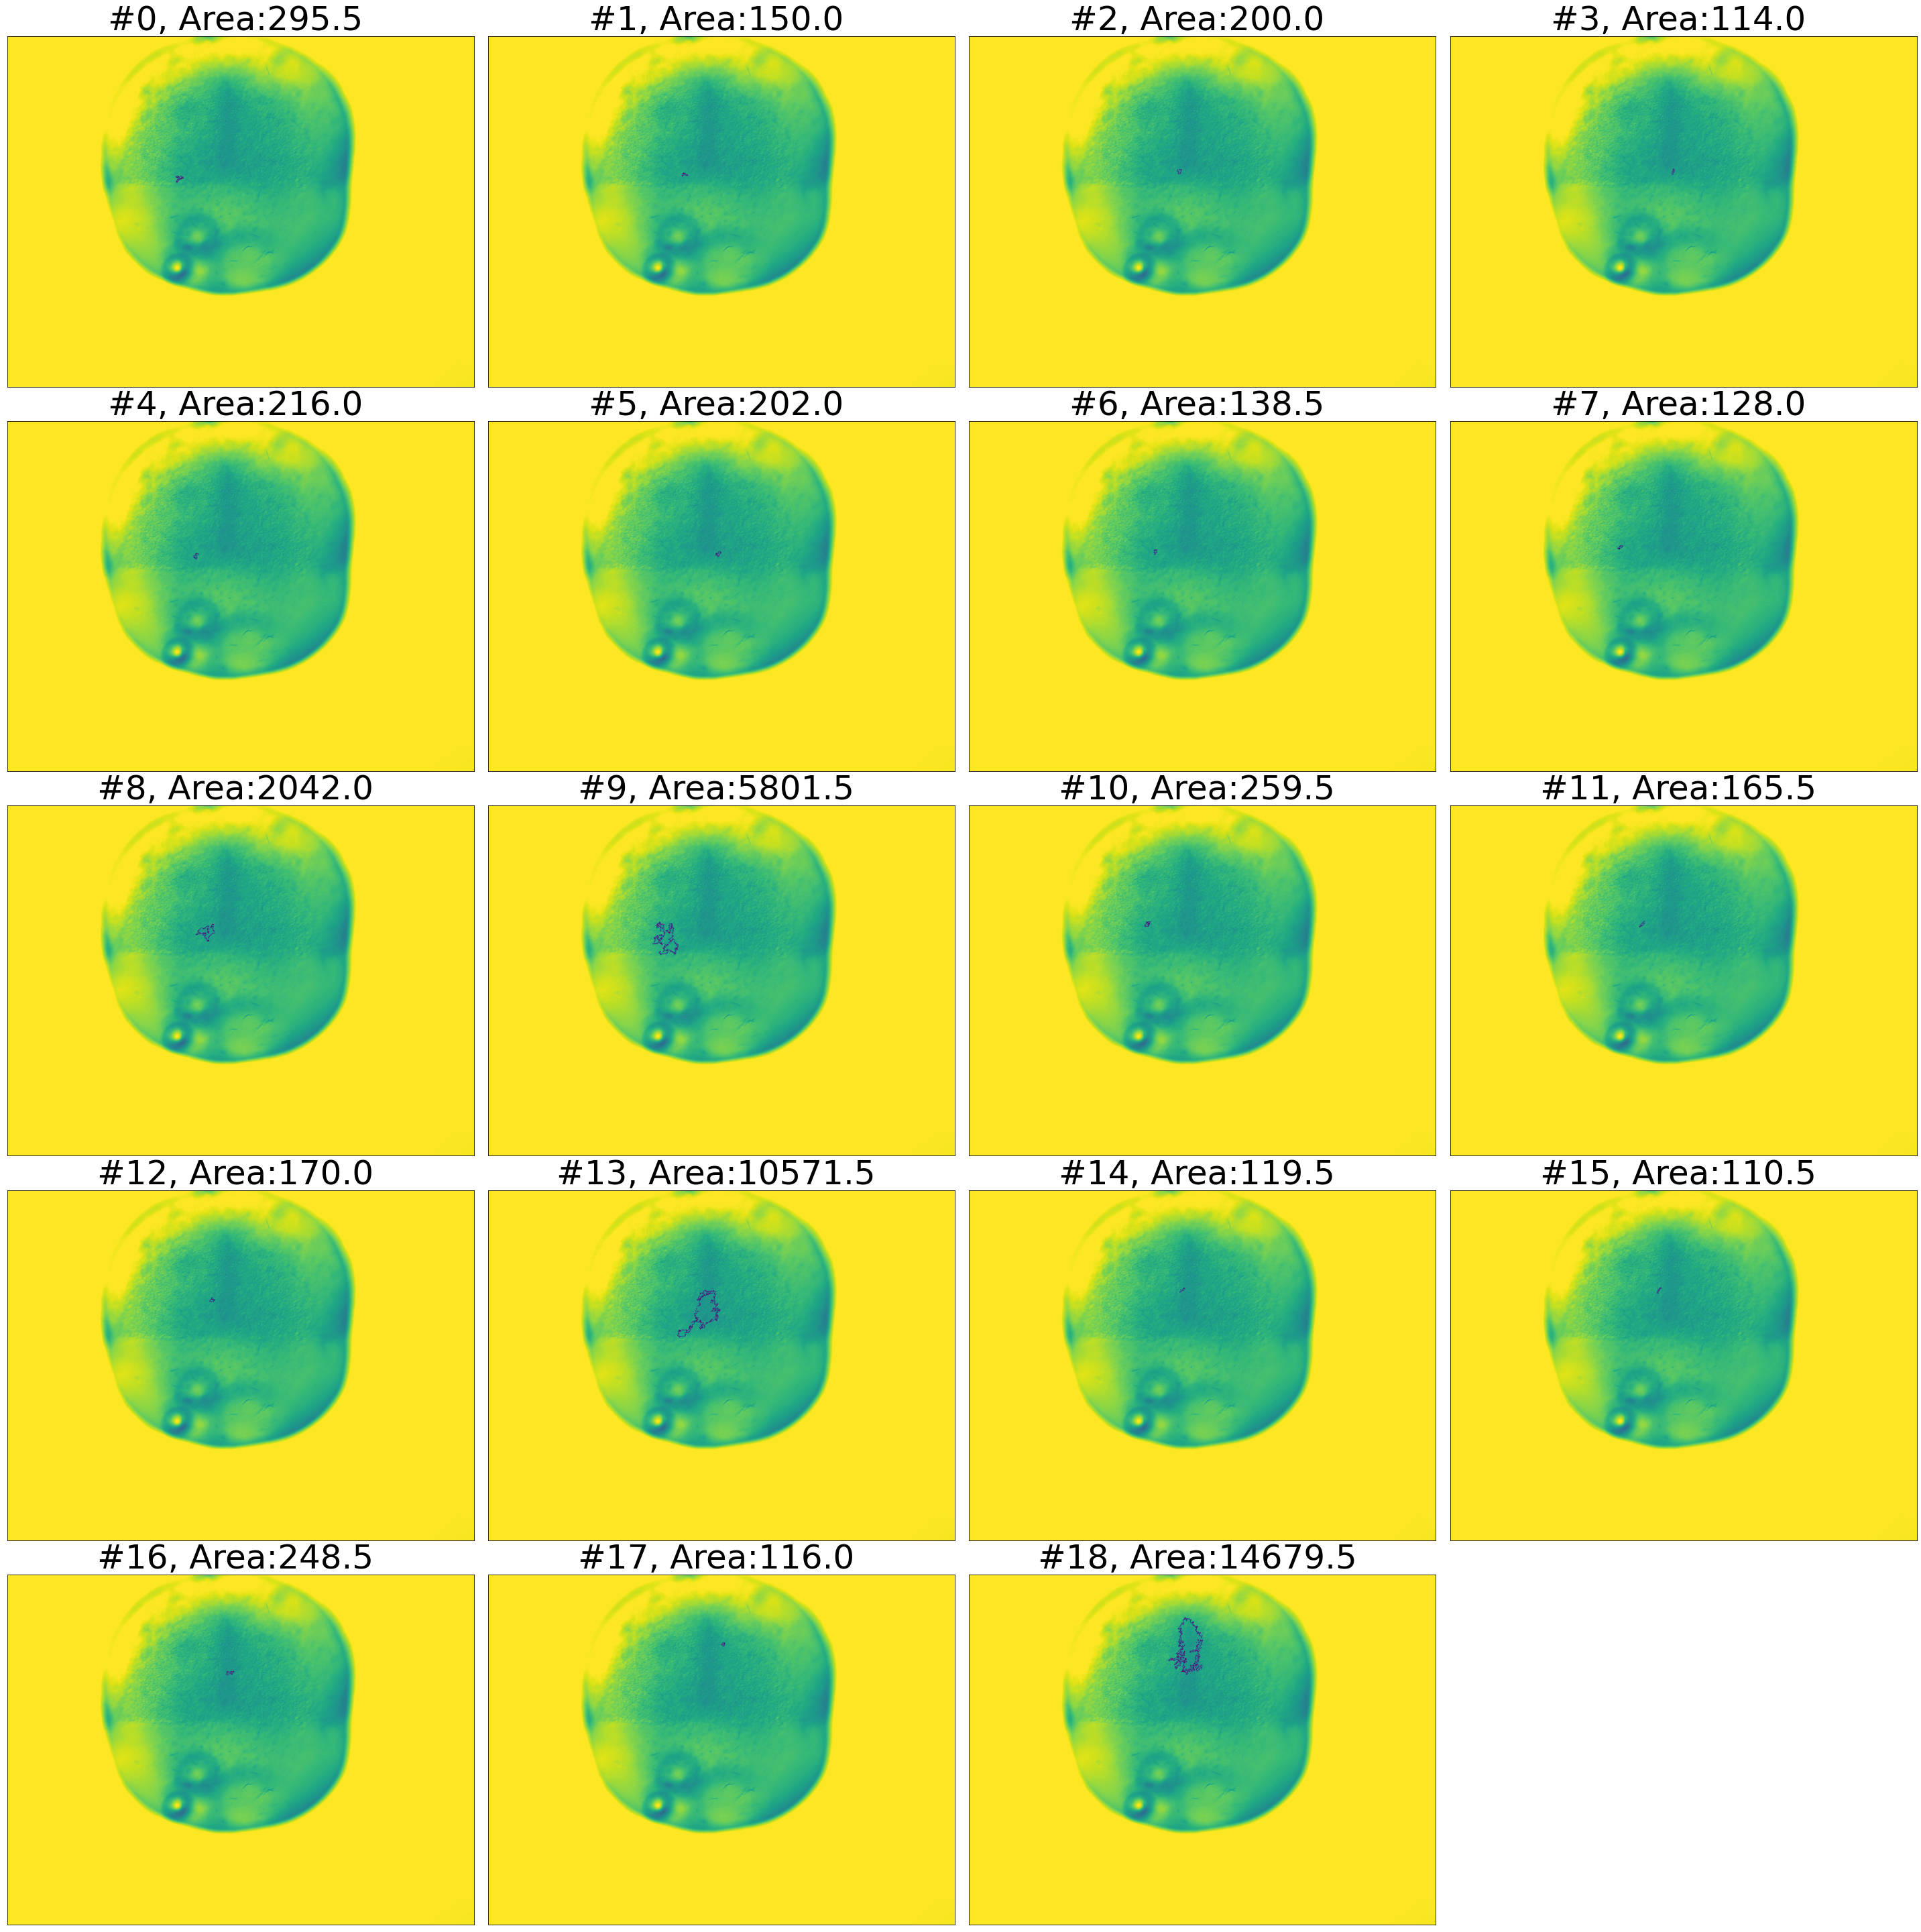

In [78]:
plt.figure(figsize=(40,40))
for i in range(len(areas)):
    imgcont =cv2.imread(img_path,0)
    plt.subplot(int(len(areas)/4)+1,4,i+1)
    plt.imshow(cv2.drawContours(imgcont,
                            areas[i]
                            ,-1
                            ,(0,0,255),
                           thickness = 2))
    plt.title('#{}, Area:{} '.format(i, cv2.contourArea(areas[i])), fontsize = 50)
    plt.xticks([])
    plt.yticks([])
plt.tight_layout()

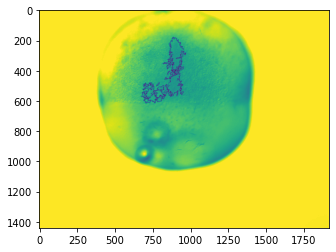

In [62]:
plt.imshow(imgcont)

In [76]:
cv2.contourArea(areas[0])

295.5

In [83]:
os.path.splitext(os.path.basename(img_path))[0]

'ndr2_st.15_202204080_20220411_embryo10_1_expression'